In [1]:
import matplotlib.pyplot as plt
import numpy as np
from shared_modules import load_dill_vars, get_times, graph_time, get_library_results
from reddit_modules import get_subreddit_results, graph_subreddit

Loading Variables

In [2]:
twitter_vars = load_dill_vars("twitter")
reddit_vars = load_dill_vars("reddit")

Time Calculation

In [ ]:
twitter_times = get_times(twitter_vars)
reddit_times = get_times(reddit_vars)

Time Graphs

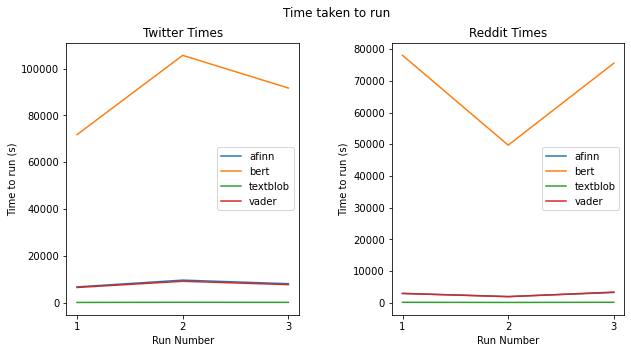

In [ ]:
graph_time(twitter_times, reddit_times, "sentiment_graphs/time_taken.png")

## Sentiment Comparisons

Afinn

<Figure size 432x288 with 0 Axes>

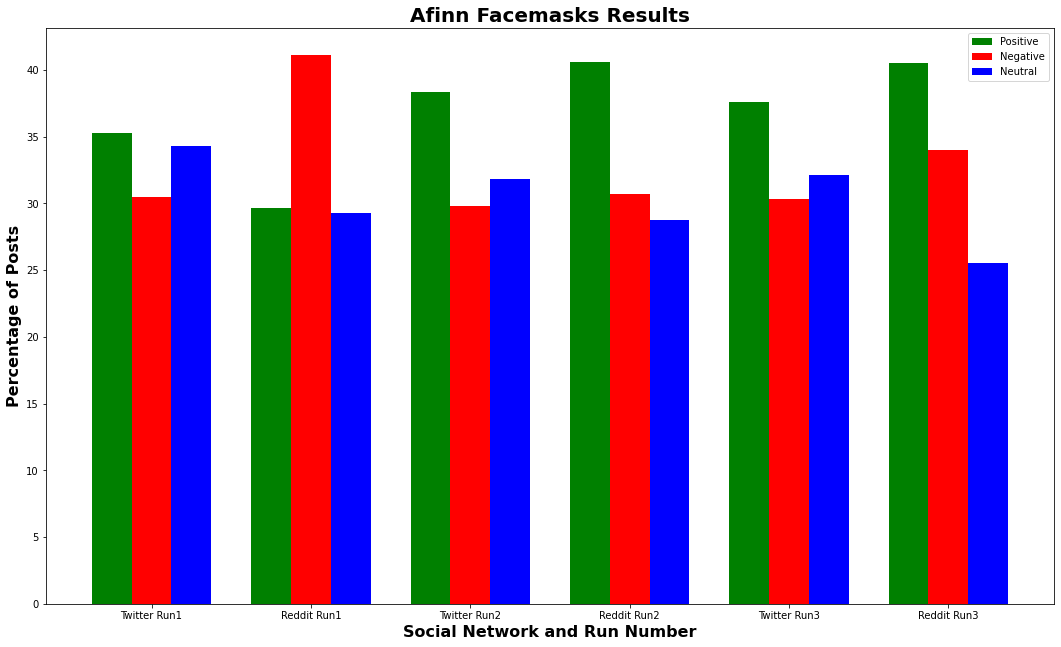

<Figure size 432x288 with 0 Axes>

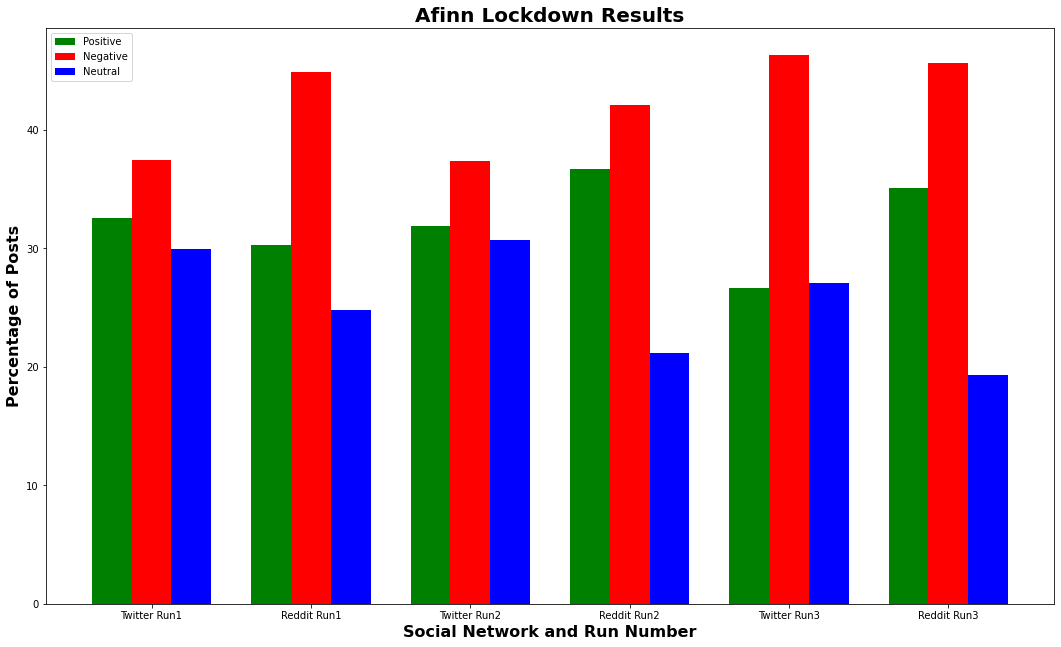

<Figure size 432x288 with 0 Axes>

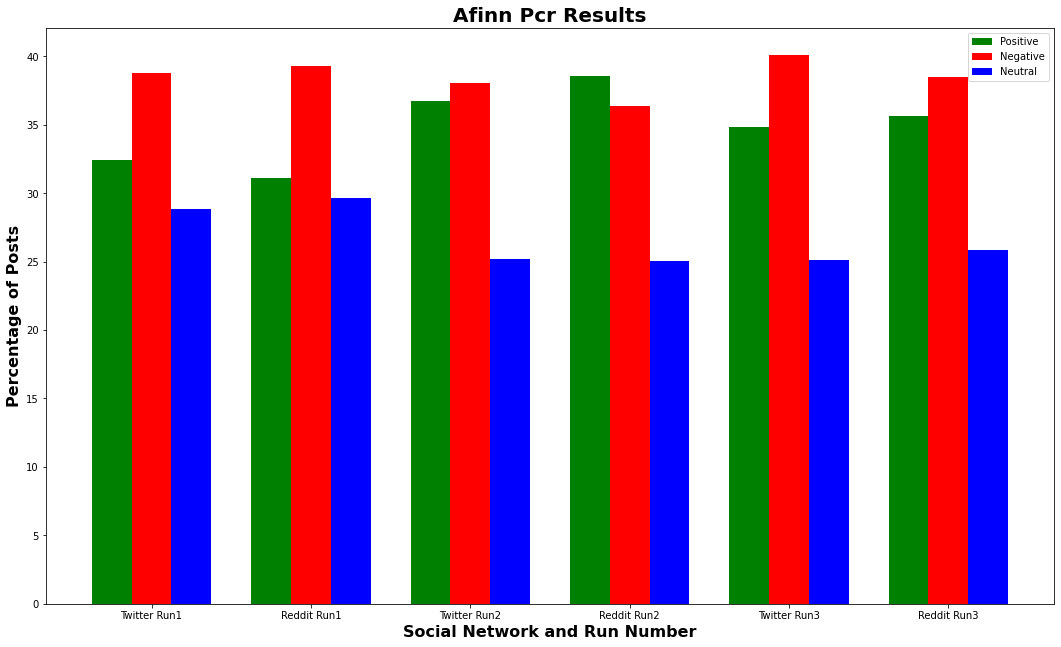

<Figure size 432x288 with 0 Axes>

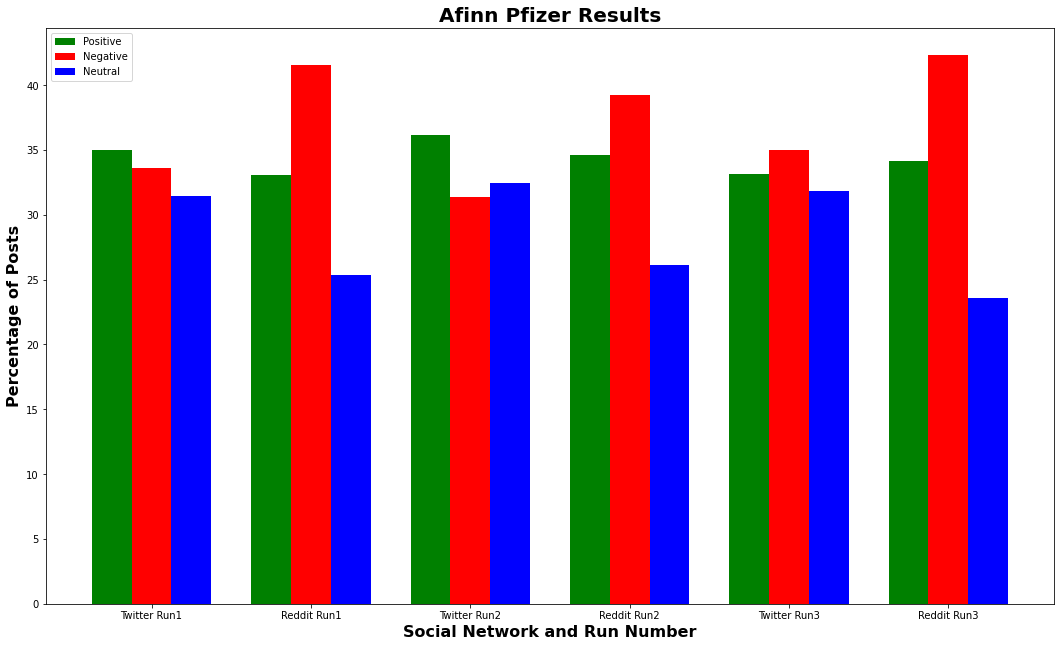

<Figure size 432x288 with 0 Axes>

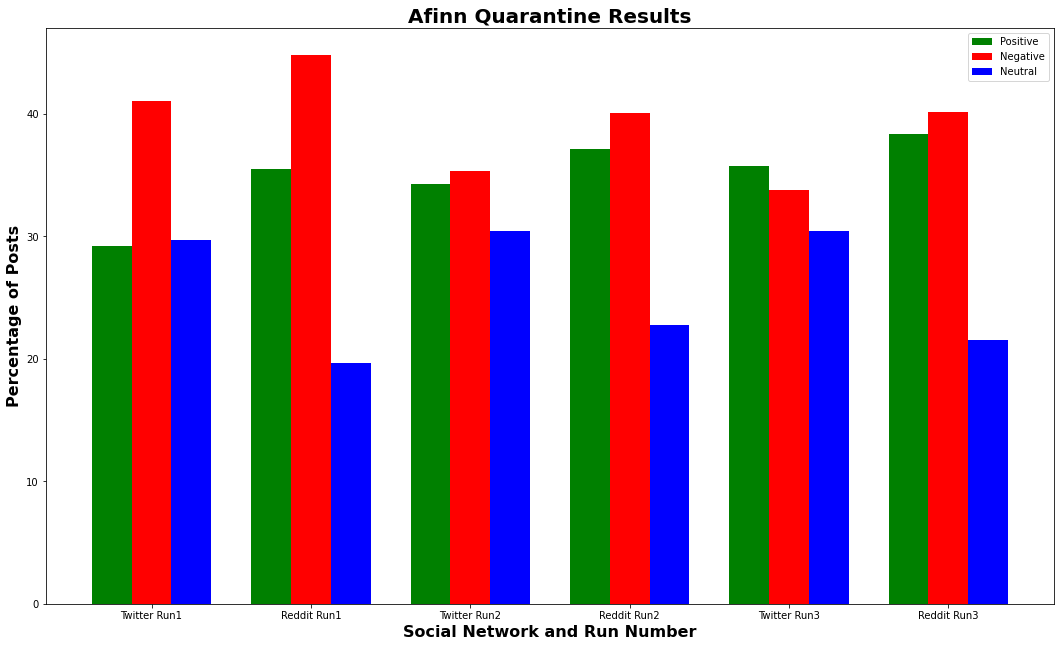

<Figure size 432x288 with 0 Axes>

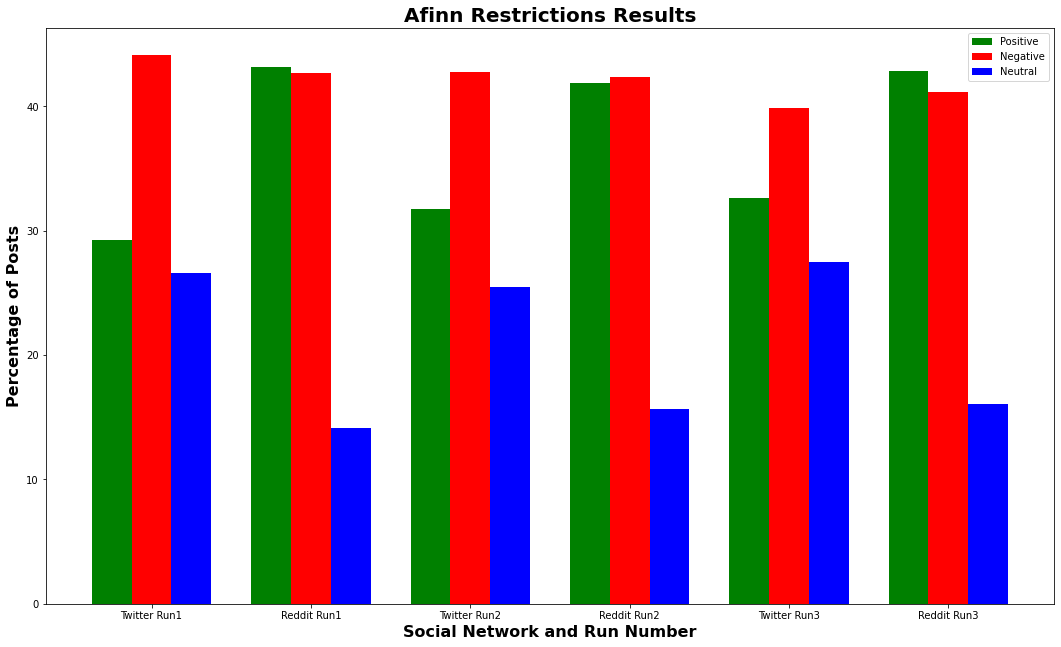

<Figure size 432x288 with 0 Axes>

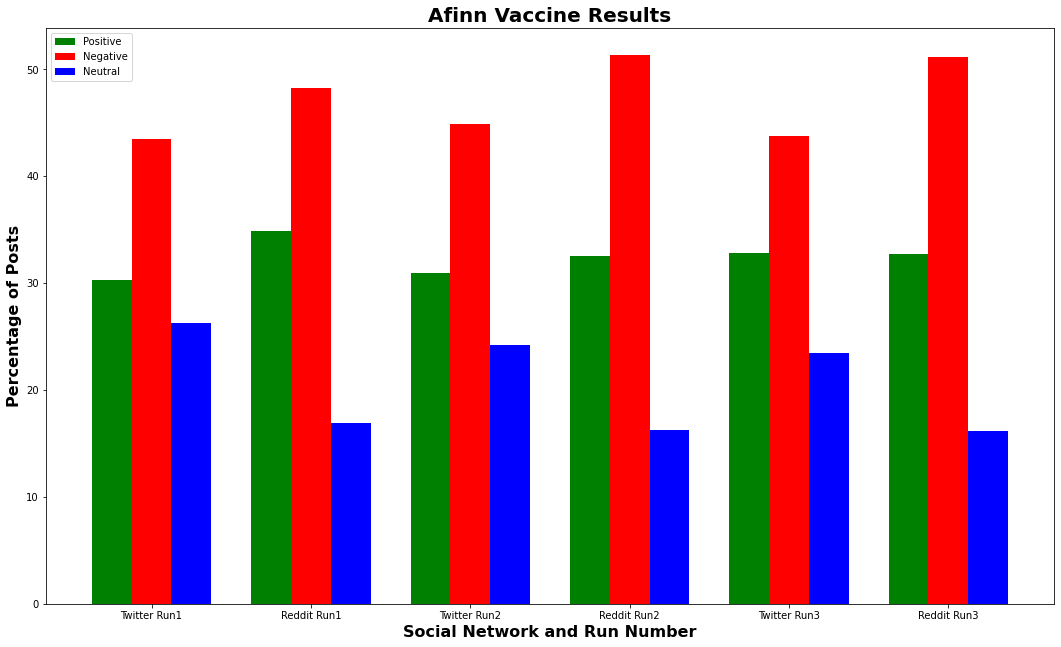

In [3]:
get_library_results(twitter_vars, reddit_vars, "afinn")

BERT

<Figure size 432x288 with 0 Axes>

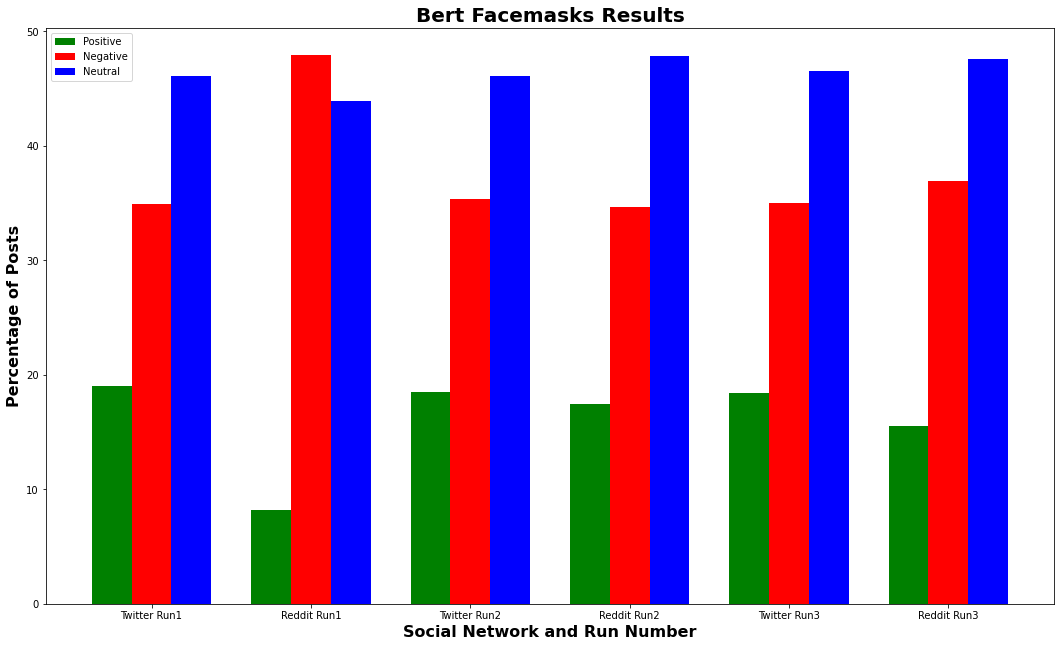

<Figure size 432x288 with 0 Axes>

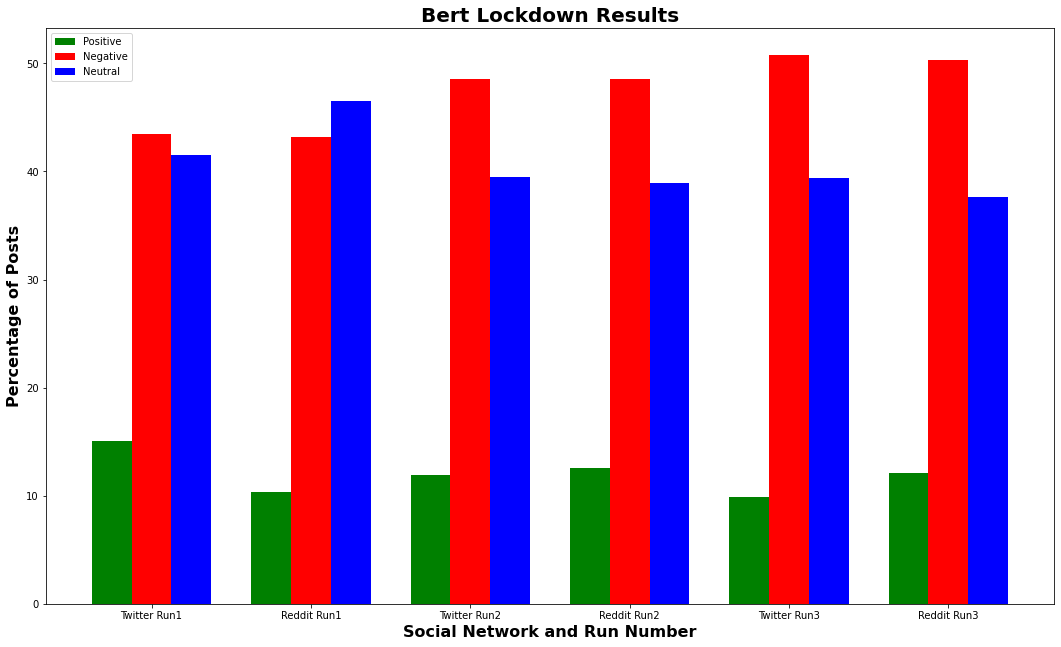

<Figure size 432x288 with 0 Axes>

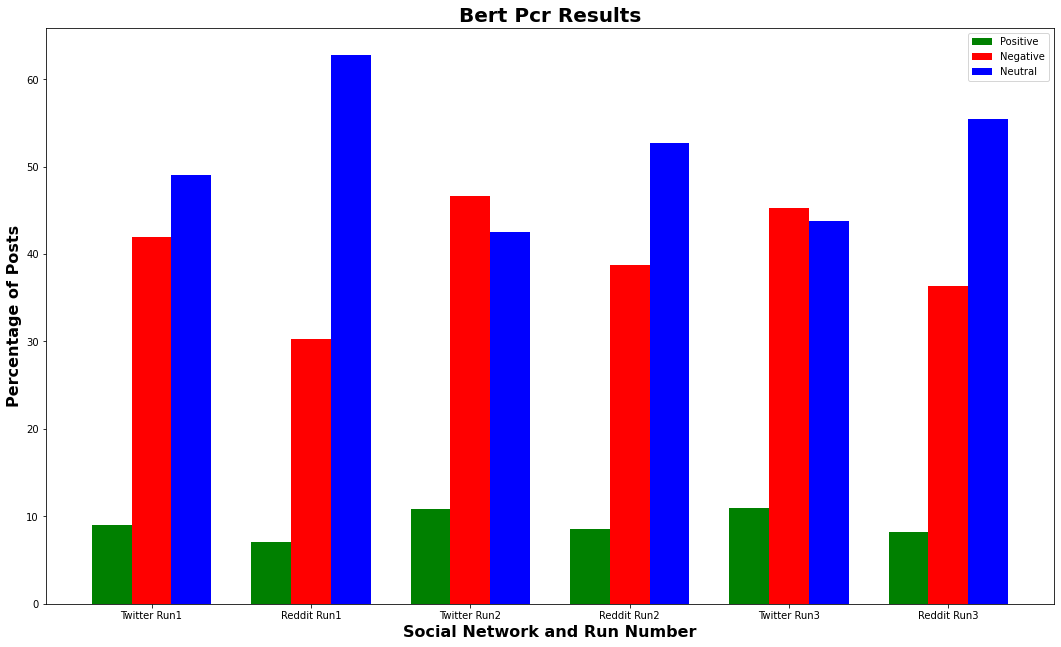

<Figure size 432x288 with 0 Axes>

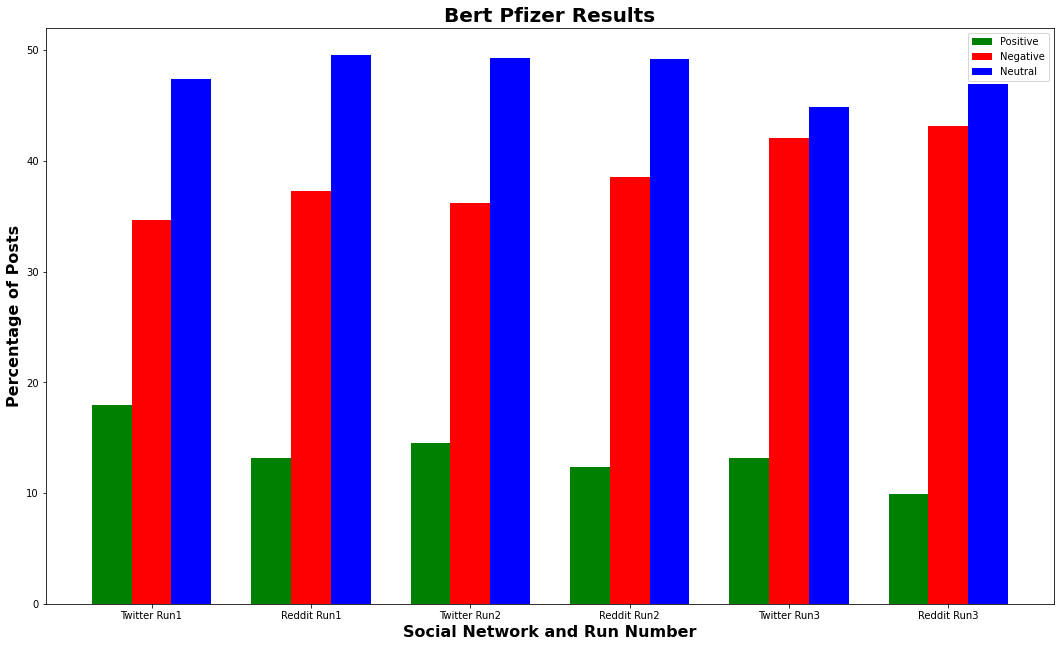

<Figure size 432x288 with 0 Axes>

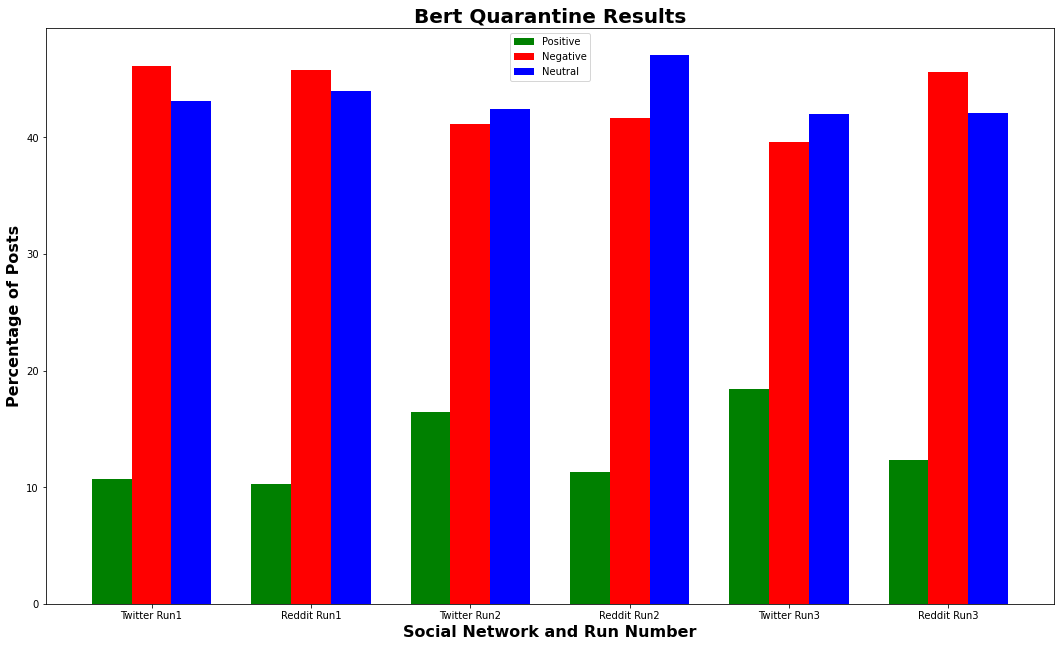

<Figure size 432x288 with 0 Axes>

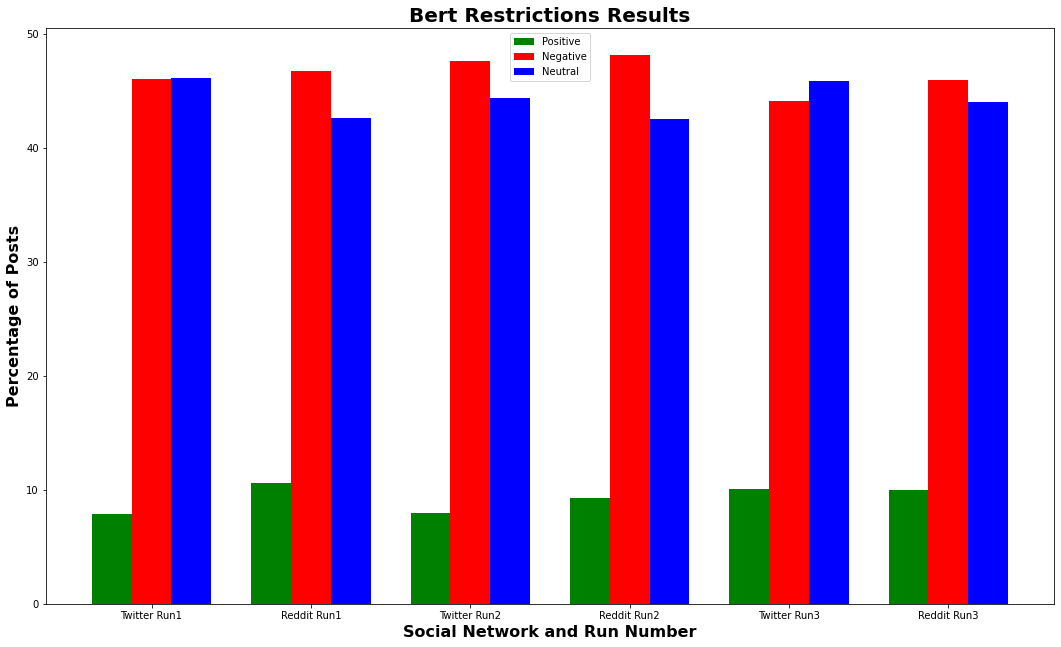

<Figure size 432x288 with 0 Axes>

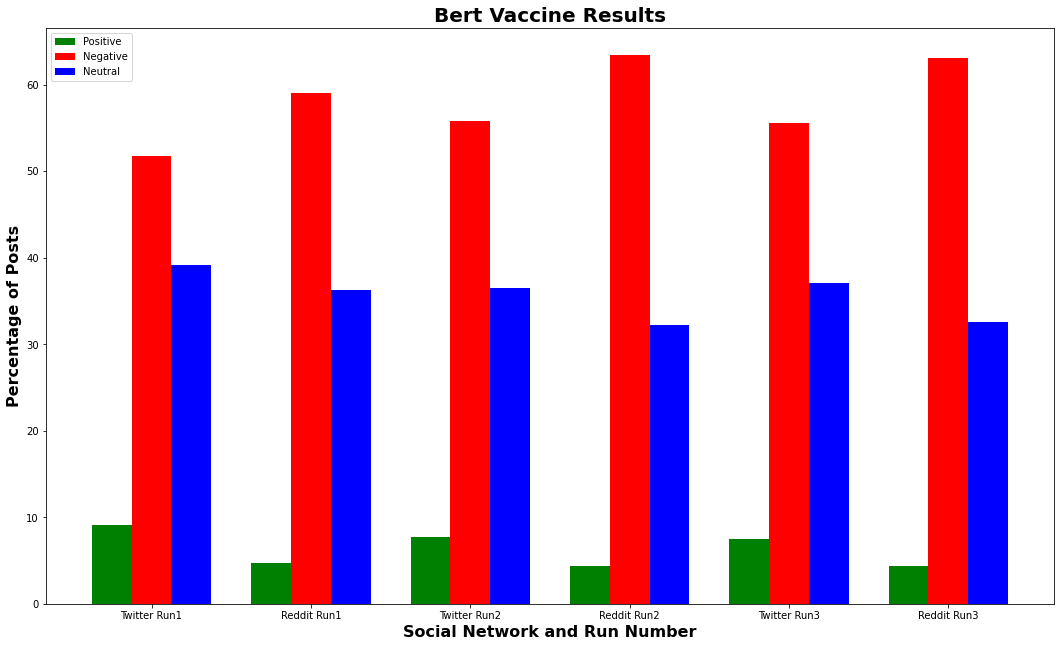

In [4]:
get_library_results(twitter_vars, reddit_vars, "bert")

TextBlob

<Figure size 432x288 with 0 Axes>

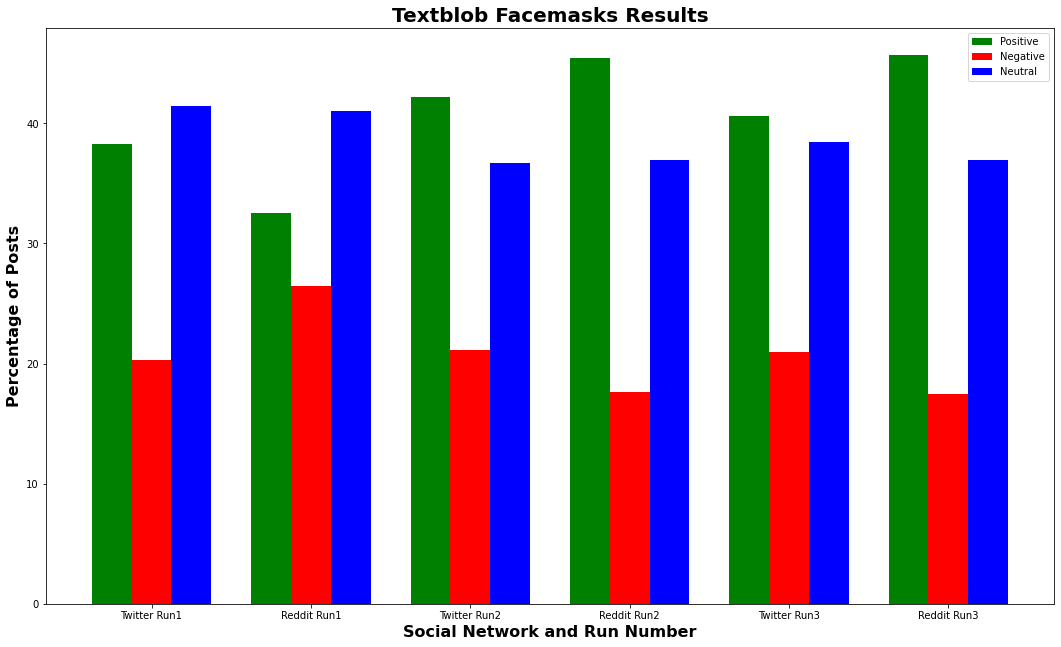

<Figure size 432x288 with 0 Axes>

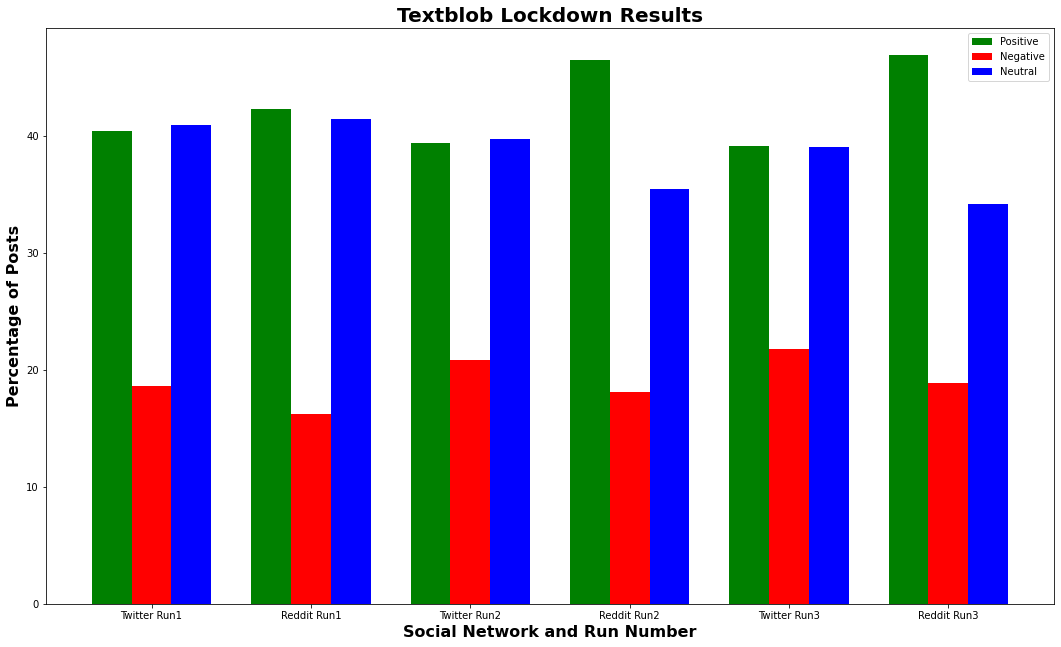

<Figure size 432x288 with 0 Axes>

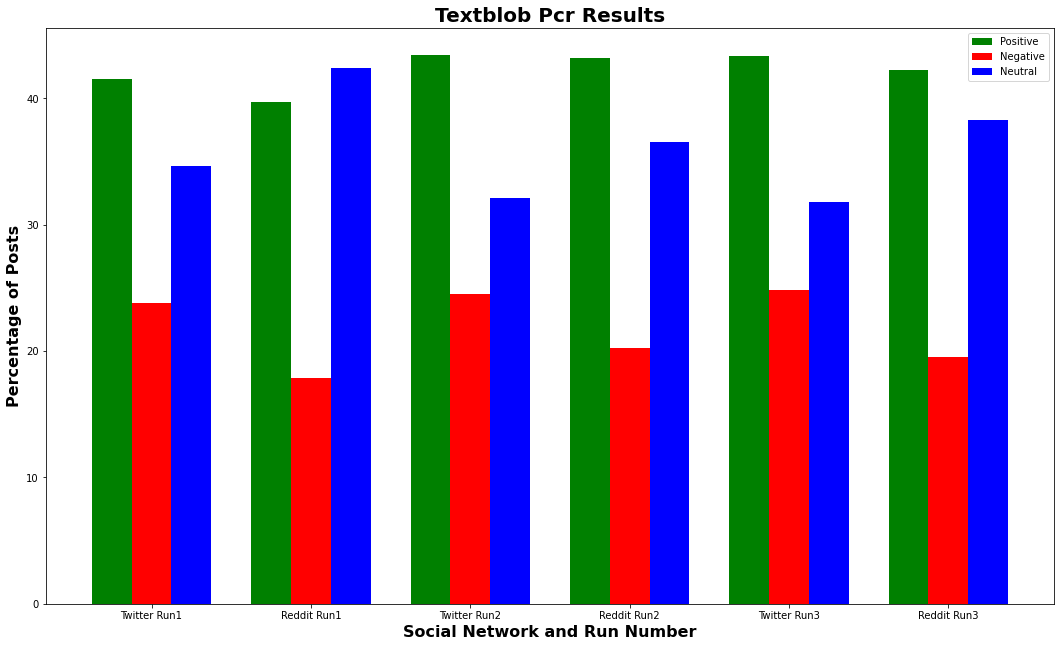

<Figure size 432x288 with 0 Axes>

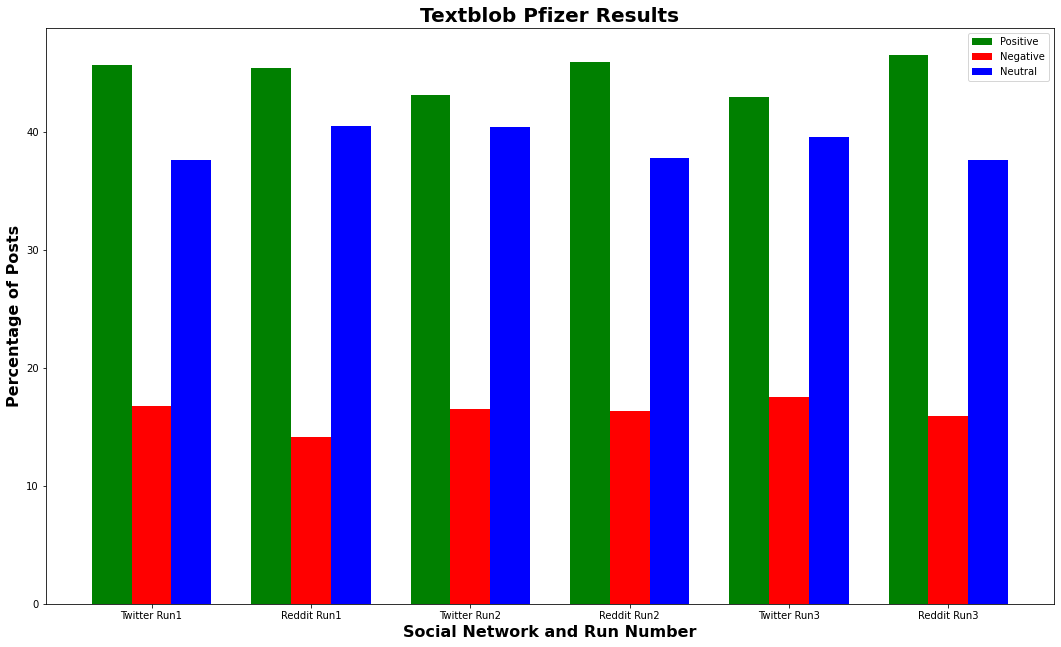

<Figure size 432x288 with 0 Axes>

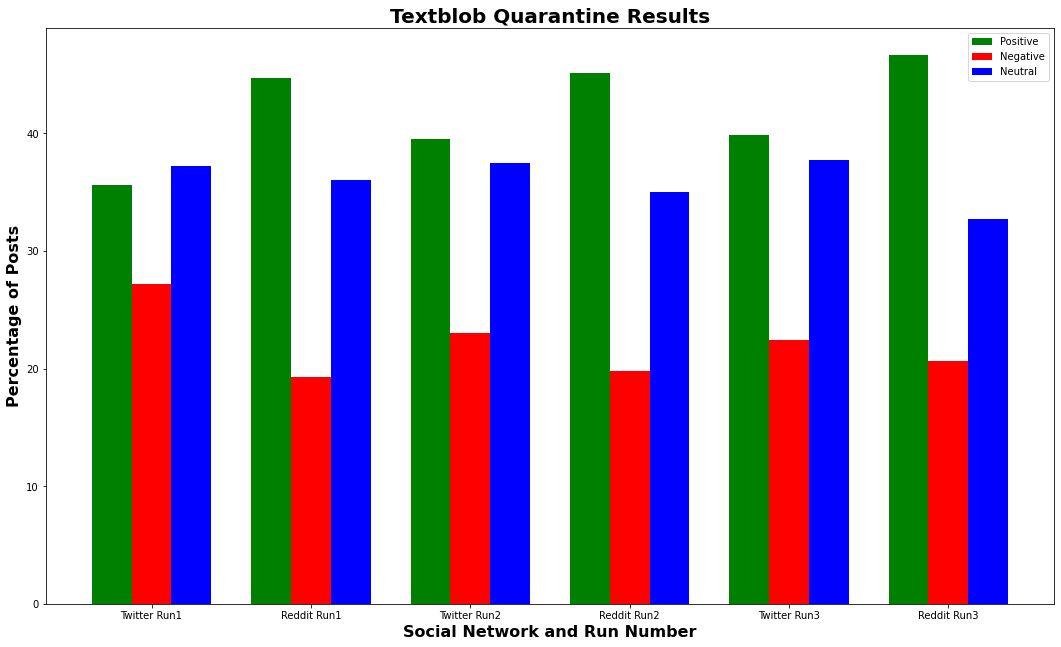

<Figure size 432x288 with 0 Axes>

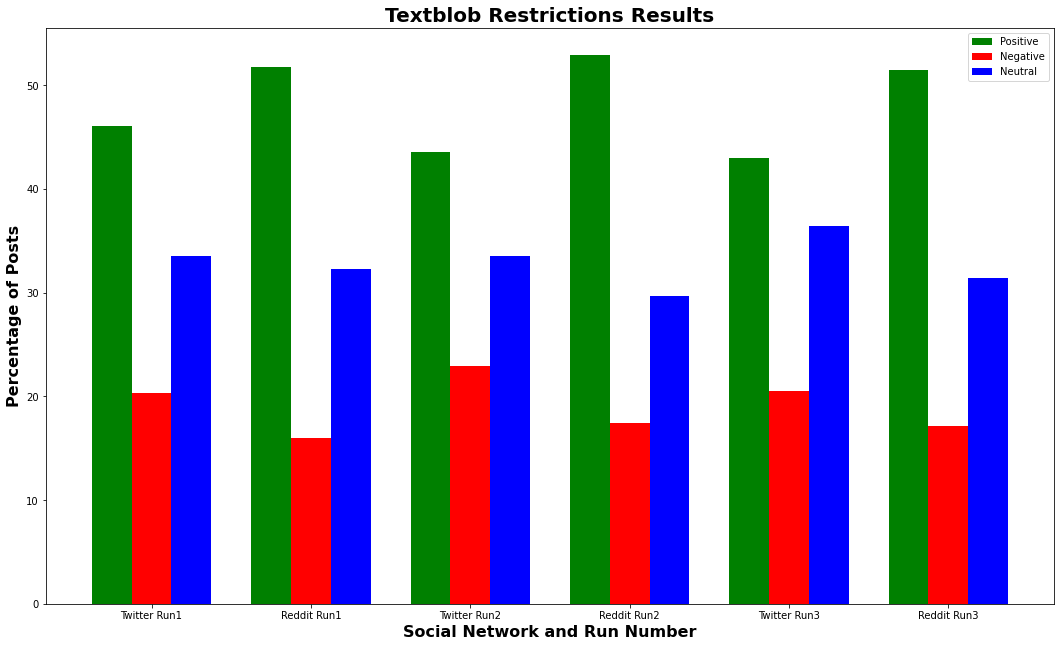

<Figure size 432x288 with 0 Axes>

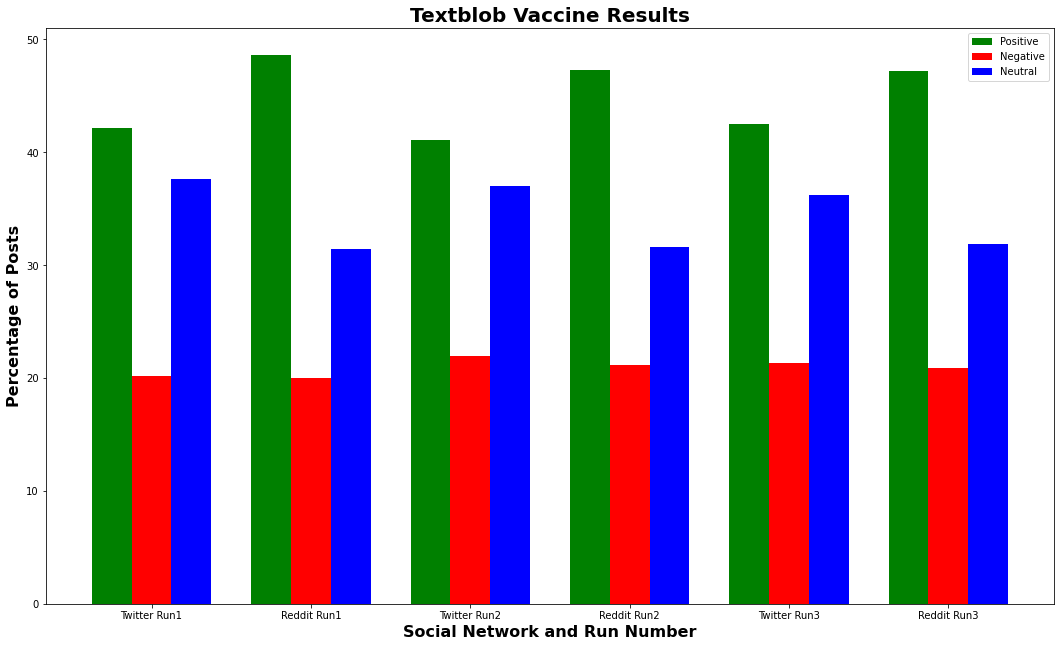

In [5]:
get_library_results(twitter_vars, reddit_vars, "textblob")

VADER

<Figure size 432x288 with 0 Axes>

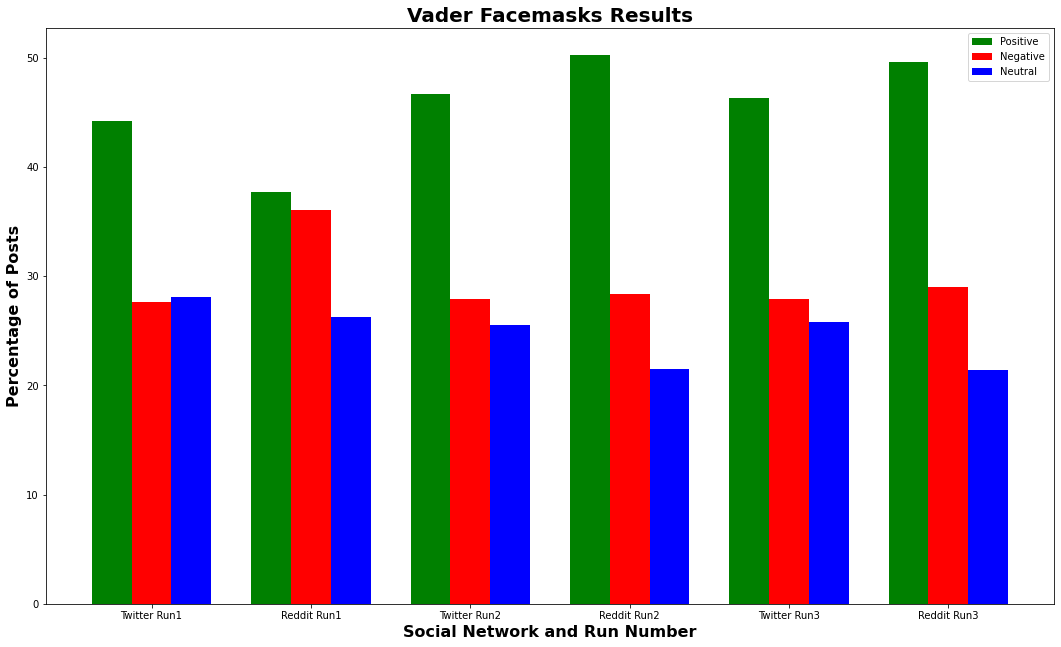

<Figure size 432x288 with 0 Axes>

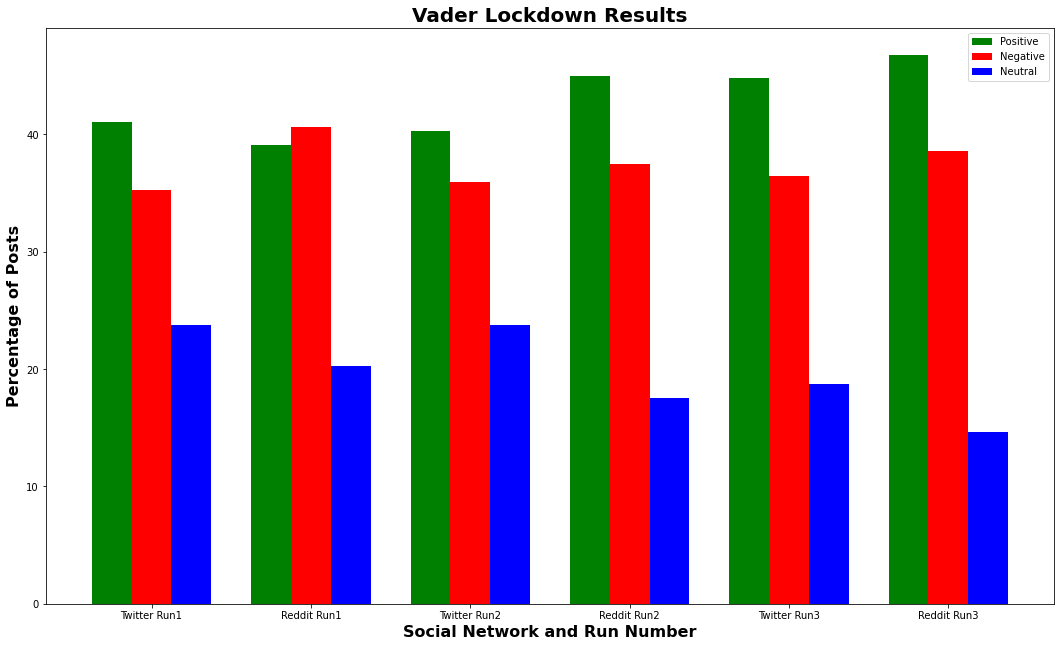

<Figure size 432x288 with 0 Axes>

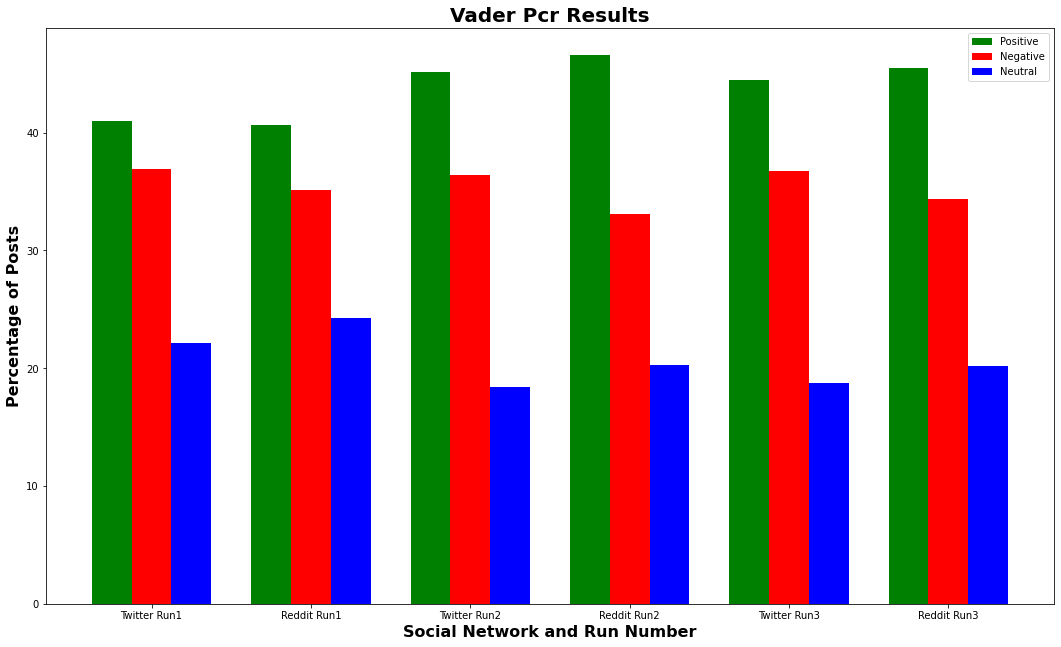

<Figure size 432x288 with 0 Axes>

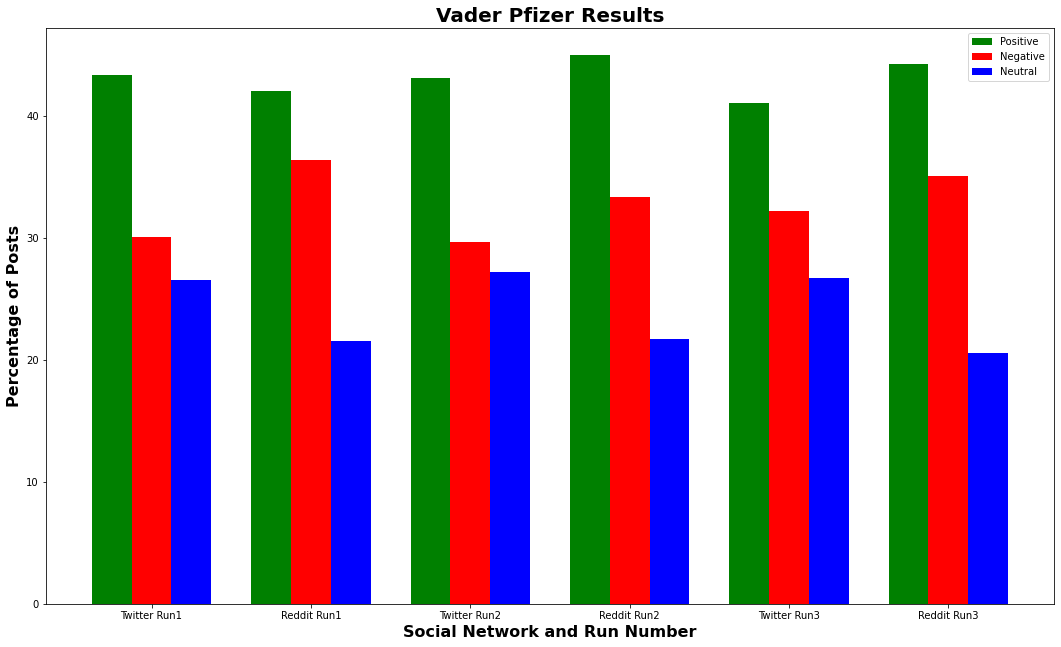

<Figure size 432x288 with 0 Axes>

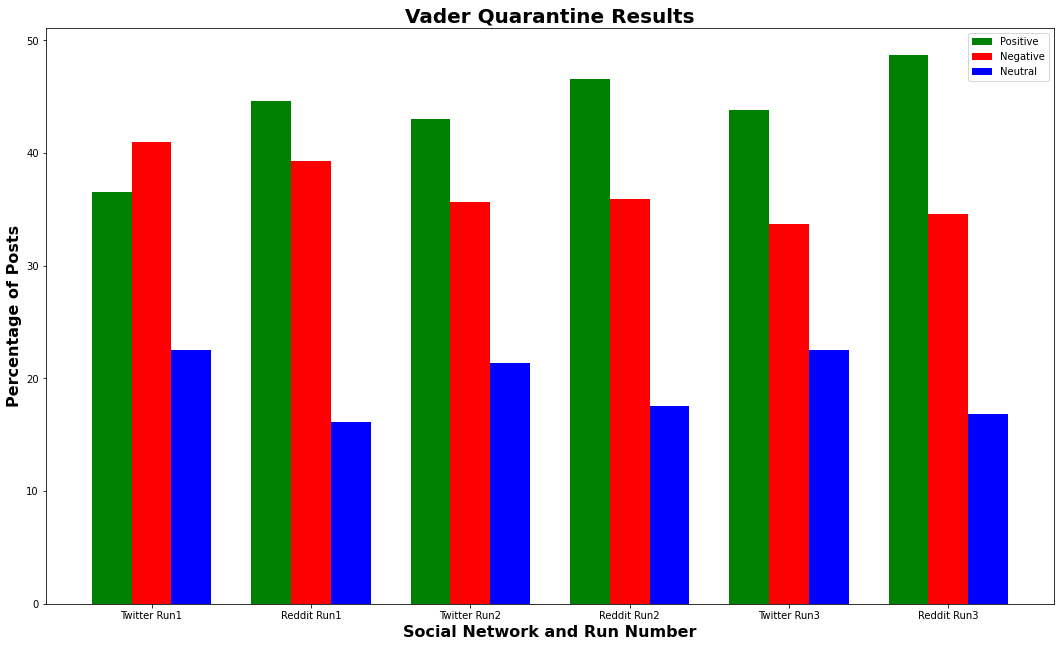

<Figure size 432x288 with 0 Axes>

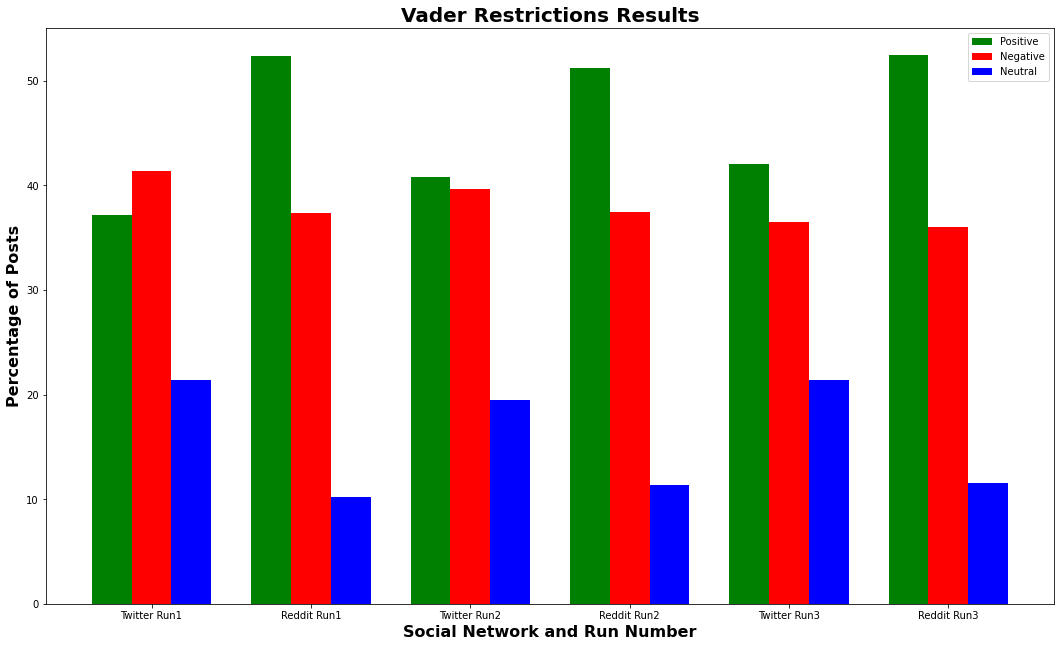

<Figure size 432x288 with 0 Axes>

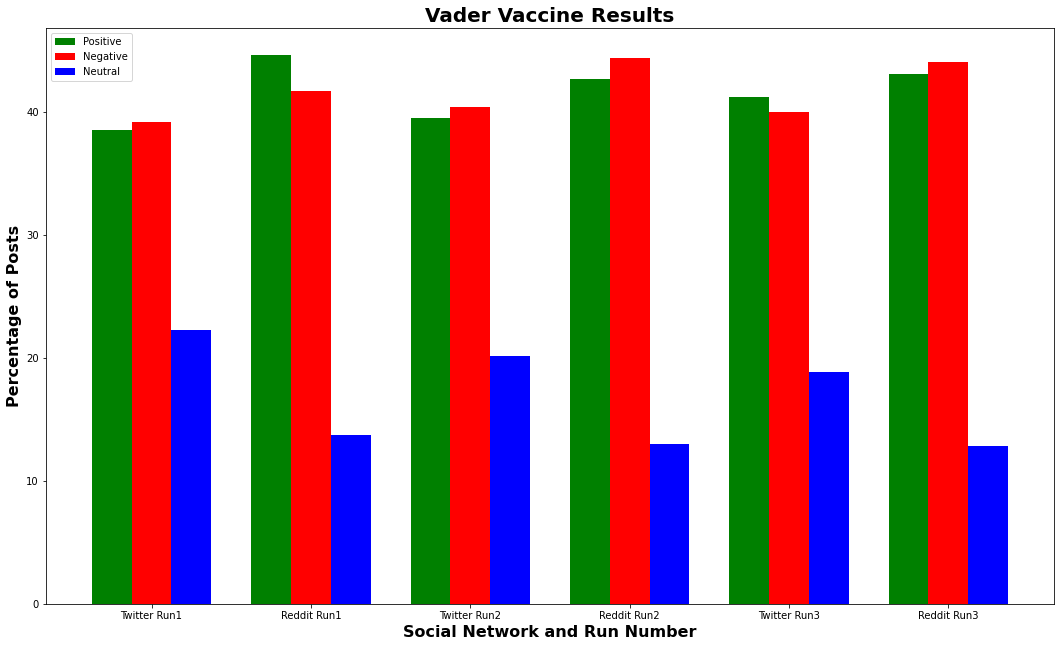

In [6]:
get_library_results(twitter_vars, reddit_vars, "vader")

## Subreddit Investigation

### Investigation with threshold

In [ ]:
for library in reddit_vars:
    for run in reddit_vars[library]:
        for topic in reddit_vars[library][run]:
            if topic != "time":
                df = get_subreddit_results(reddit_vars[library][run][topic])
                ratio = df["total_num"].mean()
                
                neg_df = df[df["total_num"] > ratio].sort_values(["neg_perc"], ascending=False).head(10)
                pos_df = df[df["total_num"] > ratio].sort_values(["pos_perc"], ascending=False).head(10)
                
                graph_subreddit(neg_df.sort_values(["neg_perc"], ascending=True).head(10), "Negative", library, topic, run, "threshold")
                graph_subreddit(pos_df.sort_values(["pos_perc"], ascending=True).head(10), "Positive", library, topic, run, "threshold")

### Only investigating top percentages - saves graphs to a folder as too many

In [3]:
for library in reddit_vars:
    for run in reddit_vars[library]:
        for topic in reddit_vars[library][run]:
            if topic != "time":
                df = get_subreddit_results(reddit_vars[library][run][topic])
                
                neg_df = df.sort_values(["neg_perc"], ascending=False).head(10)
                pos_df = df.sort_values(["pos_perc"], ascending=False).head(10)
                
                graph_subreddit(neg_df.sort_values(["neg_perc"], ascending=True).head(10), "Negative", library, topic, run, "top")
                graph_subreddit(pos_df.sort_values(["pos_perc"], ascending=True).head(10), "Positive", library, topic, run, "top")